<a href="https://colab.research.google.com/github/nanabonsu92/Deep-Learning_TIES4911/blob/main/Bonsu_Afrane_Kwaku_Simple__Linear_Regression(Using_Boston_Housing_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reload the dataset
dataframe = pd.read_csv("/content/gdrive/MyDrive/Deep Learning 2024/HousingData.csv")

In [ ]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Drop rows with any missing values (NaNs)
df = dataframe.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [ ]:
# Linear regressor
class SimpleLinearRegression:
  def __init__(self, initializer='random'):
    if initializer=='ones':
      self.var = 1.
    elif initializer=='zeros':
      self.var = 0.
    elif initializer=='random':
      self.var = tf.random.uniform(shape=[], minval=0., maxval=1.)
    self.m = tf.Variable(1., shape=tf.TensorShape(None))
    self.b = tf.Variable(self.var)

  def predict(self, x):
    return tf.reduce_sum(self.m * x, 1) + self.b

  def mse(self, true, predicted):
    return tf.reduce_mean(tf.square(true-predicted))

  def update(self, X, y, learning_rate):
    with tf.GradientTape(persistent=True) as g:
      loss = self.mse(y, self.predict(X))
    print("Loss: ", loss)
    dy_dm = g.gradient(loss, self.m)
    dy_db = g.gradient(loss, self.b)
    self.m.assign_sub(learning_rate * dy_dm)
    self.b.assign_sub(learning_rate * dy_db)

  def train(self, X, y, learning_rate=0.01, epochs=5):
    if len(X.shape)==1:
      X=tf.reshape(X,[X.shape[0],1])
    self.m.assign([self.var]*X.shape[-1])

    for i in range(epochs):
      print("Epoch: ", i)

      self.update(X, y, learning_rate)

In [ ]:
feature_columns = ['RM']  # Using 'RM' (average number of rooms)
target_column = 'MEDV'    # Target: 'MEDV' (Median value of homes)


'''# Assuming the last column is the target, and the rest are features
X = df.iloc[:, :-1].values'''
Y = df.iloc[:, -1].values

In [ ]:
# Extracting the features and target
X = dataframe[feature_columns]
Y = dataframe[target_column]

In [ ]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Check the data type of y_train
print("Data type of y_train:", y_train.dtype)

Data type of y_train: float64


In [ ]:
# standardize the data
mean_label = y_train.mean(axis=0)
std_label = y_train.std(axis=0)
mean_feat = x_train.mean(axis=0)
std_feat = x_train.std(axis=0)
x_train_norm = (x_train-mean_feat)/std_feat
y_train_norm = (y_train-mean_label)/std_label

In [ ]:
# Create and train a regressor
class SimpleLinearRegression:
    def __init__(self, initializer='zeros'):
        if initializer == 'zeros':
            self.m = tf.Variable(0.0, trainable=True)
            self.b = tf.Variable(0.0, trainable=True)
        # Add other initializers if needed

    def predict(self, X):
        return self.m * X + self.b

    def train(self, X, y, learning_rate, epochs):
        # Ensure X and y are 1-dimensional
        X = np.array(X).flatten()
        y = np.array(y).flatten()

        # Training loop
        for epoch in range(epochs):
            with tf.GradientTape() as g:
                predictions = self.predict(X)
                loss = tf.reduce_mean(tf.square(y - predictions))

            # Compute gradients
            dy_dm, dy_db = g.gradient(loss, [self.m, self.b])

            # Update weights
            self.m.assign_sub(learning_rate * dy_dm)
            self.b.assign_sub(learning_rate * dy_db)

            if epoch % 1000 == 0:
                print(f"Epoch: {epoch}, Loss: {loss.numpy()}")

# Usage Example
linear_model = SimpleLinearRegression('zeros')
linear_model.train(x_train_norm, y_train_norm, learning_rate=0.01, epochs=10000)

Epoch: 0, Loss: 0.9975247383117676
Epoch: 1000, Loss: 0.5016751289367676
Epoch: 2000, Loss: 0.5016751289367676
Epoch: 3000, Loss: 0.5016751289367676
Epoch: 4000, Loss: 0.5016751289367676
Epoch: 5000, Loss: 0.5016751289367676
Epoch: 6000, Loss: 0.5016751289367676
Epoch: 7000, Loss: 0.5016751289367676
Epoch: 8000, Loss: 0.5016751289367676
Epoch: 9000, Loss: 0.5016751289367676


In [ ]:
# standardize
x_test_norm = (x_test-mean_feat)/std_feat

In [ ]:
# prediction on test data
test_pred = linear_model.predict(x_test_norm)

In [ ]:
# reverse standardization
test_pred *= std_label
test_pred += mean_label

In [ ]:
# prediction on train data
train_pred = linear_model.predict(x_train_norm)# reverse standardization
train_pred *= std_label
train_pred += mean_label

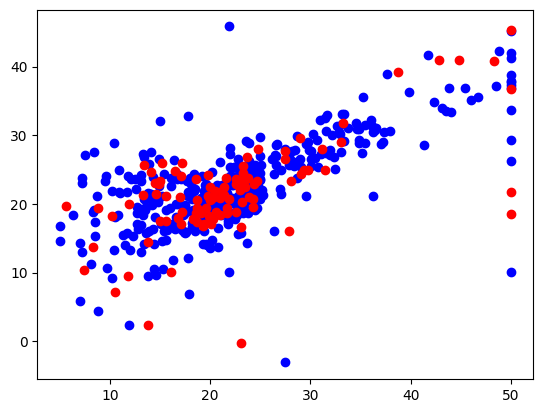

In [ ]:
# visualize prediction…
plt.scatter(y_train , train_pred, color = 'blue')
plt.scatter(y_test , test_pred, color = 'red')